<a href="https://colab.research.google.com/github/chang-ho-jeon/wallmart_dataset_analysis/blob/main/wallmart_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 67 Sep 27 12:00 kaggle.json
/content


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other
walmart-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
with zipfile.ZipFile('walmart-sales-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [7]:
import pandas as pd

# 데이터셋 로드
data = pd.read_csv('data/walmart.csv')

In [8]:
import pandas as pd
df = pd.read_csv('data/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#eda
구매금액과 Gender
구매금액과 Age
""         Occupation
""        product_ID


In [ ]:
#전체 데이타가 몇개인가?
num_rows = df.shape[0]  # DataFrame의 행 수를 가져옵니다.
print(f"CSV 파일에는 {num_rows}개의 데이터가 있습니다.")  # 결과를 출력합니다.

CSV 파일에는 550068개의 데이터가 있습니다.


In [ ]:
num_unique_users = df['User_ID'].nunique()
print(f"User_ID의 개수는 {num_unique_users}개입니다.")

User_ID의 개수는 5891개입니다.


In [ ]:
occupations = df['Occupation'].unique()

print("직업:")
for occupation in occupations:
    print(occupation)

직업:
10
16
15
7
20
9
1
12
17
0
3
4
11
8
19
2
18
5
14
13
6


In [ ]:
occupations_number = df['Occupation'].unique().shape[0]
print(f"직업의 개수는 {occupations_number}개입니다.")

직업의 개수는 21개입니다.


In [ ]:
most_expensive_product = df.loc[df['Purchase'].idxmax()]
# 가장 비싼 제품의 제품 ID와 카테고리 출력
print(f"가장 비싼 제품: {most_expensive_product['Product_ID']}")
print(f"카테고리: {most_expensive_product['Product_Category']}")

가장 비싼 제품: P00052842
카테고리: 10


In [ ]:
product_counts = df['Product_ID'].value_counts()

print("각기 다른 프러덕트 종류와 개수:")
print(product_counts)

각기 다른 프러덕트 종류와 개수:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64


In [ ]:
most_frequent_product = df['Product_ID'].value_counts().idxmax()

print(f"가장 많이 팔린 제품: {most_frequent_product}")

가장 많이 팔린 제품: P00265242


In [ ]:
print(df.info)

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2              

In [ ]:
print(df.describe)

<bound method NDFrame.describe of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2            

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='Age'>

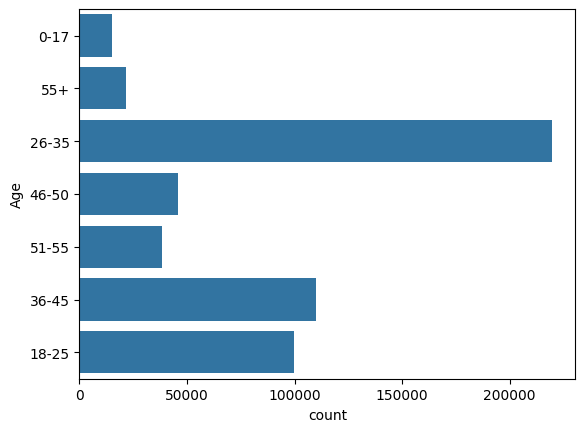

In [ ]:
sns.countplot(df['Age'])

<Axes: xlabel='Purchase', ylabel='Count'>

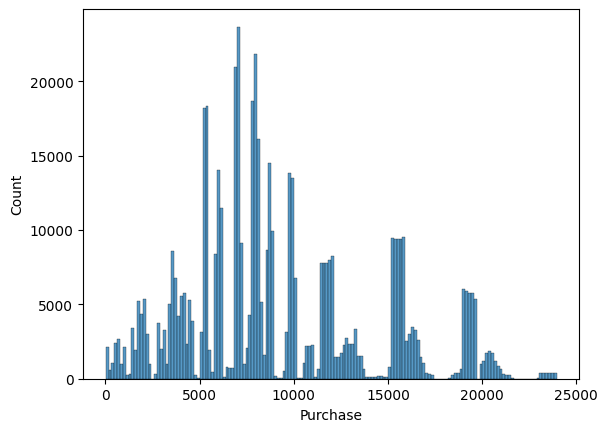

In [ ]:
sns.histplot(df['Purchase'])

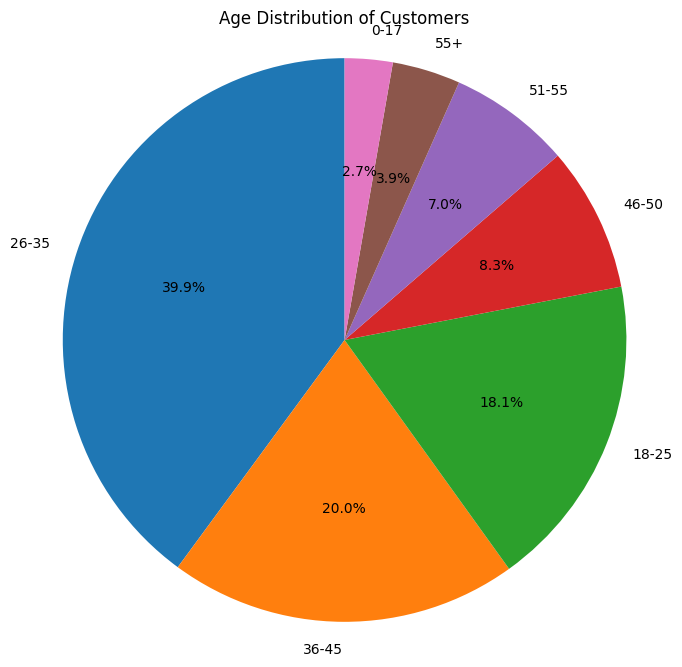

In [ ]:
# Age별 구매자 수 계산
age_counts = df['Age'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))  # 차트 크기 설정
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution of Customers')  # 제목 설정
plt.axis('equal')  # 원형 유지
plt.show()  # 차트 출력

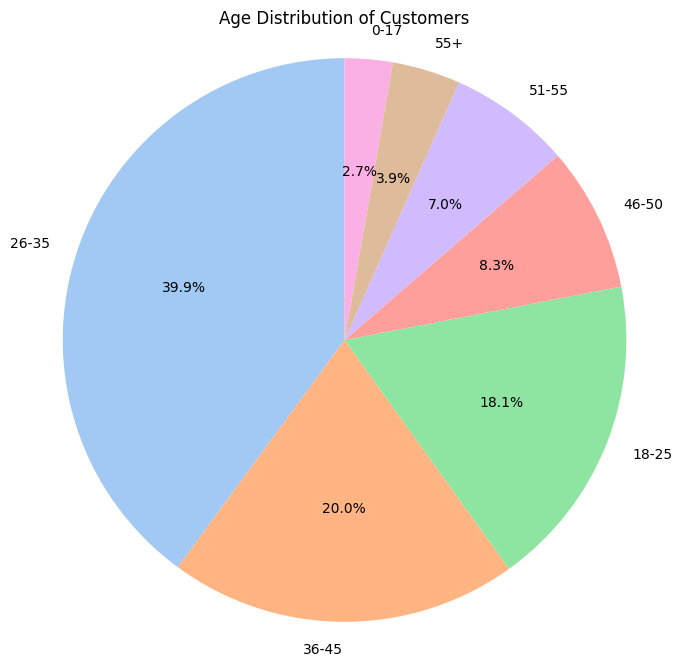

In [ ]:

# Age별 구매자 수 계산
age_counts = df['Age'].value_counts()

# Seaborn을 사용하여 파이 차트 그리기
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")  # 파스텔 색상 팔레트 설정
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette())
plt.title('Age Distribution of Customers')
plt.axis('equal')
plt.show()

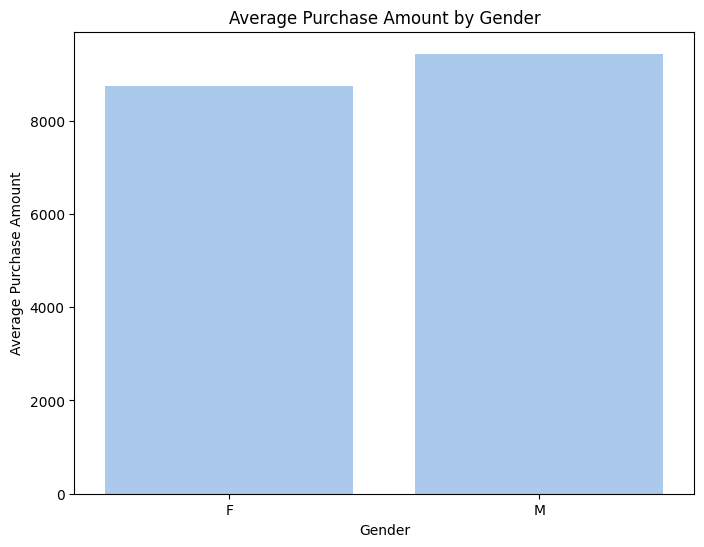

In [ ]:
gender_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()

# Seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase', data=gender_purchase)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

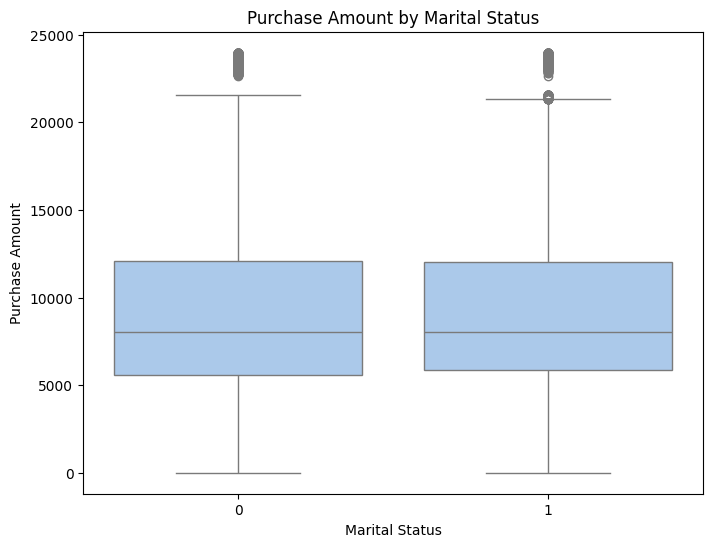

In [ ]:

# Seaborn을 사용하여 box plot 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title('Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')
plt.show()

In [ ]:
df.sort_values(by='Purchase', ascending=False).head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960
349658,1005848,P00119342,M,51-55,20,A,0,1,10,23960
292083,1003045,P00052842,M,46-50,1,B,2,1,10,23960
298378,1003947,P00116142,M,26-35,0,C,3,0,10,23959
437804,1001387,P00086242,F,51-55,13,B,1,1,10,23959
229329,1005367,P00085342,M,18-25,4,A,1,0,10,23958


In [ ]:
df.groupby('Product_ID').size().sort_values(ascending=False).head(10)


,0
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00145042,1406


In [19]:
# 예시 코드
import pandas as pd
data = pd.read_csv('data/walmart.csv')
print(data.info())  # 데이터 유형 및 결측치 확인
print(data.describe())  # 요약 통계 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None
            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean 

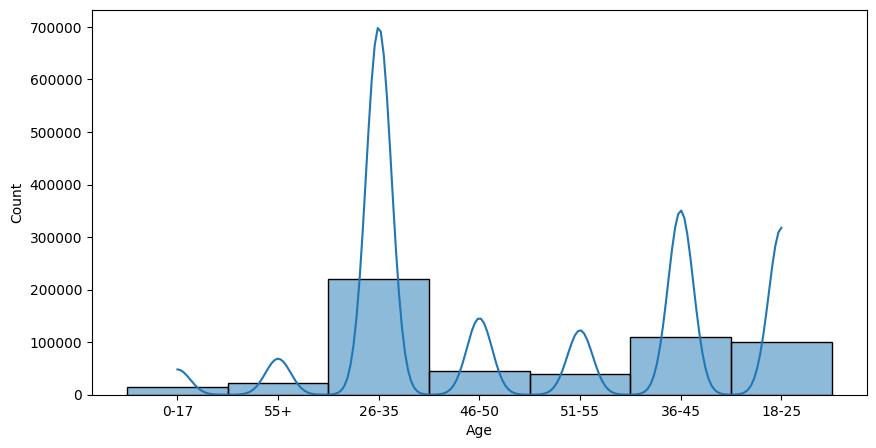

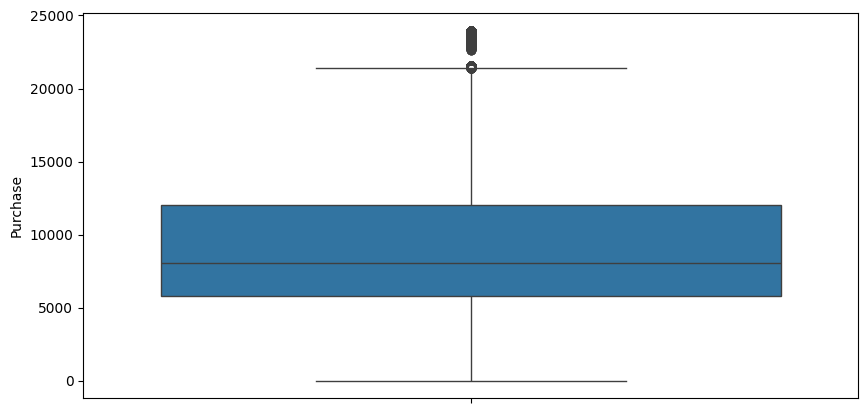

In [16]:
# 예시 코드
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data['Purchase'])
plt.show()

<Axes: xlabel='Gender', ylabel='Purchase'>

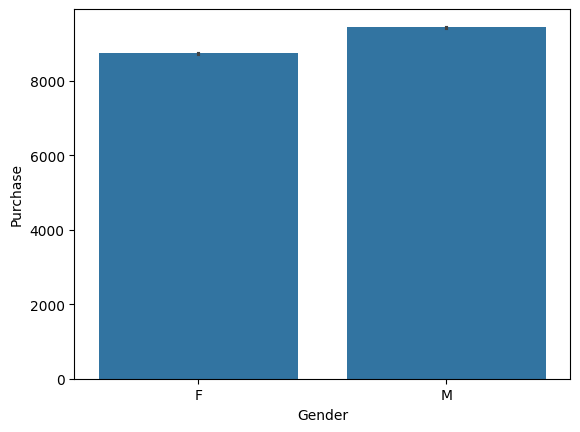

In [17]:
sns.barplot(x='Gender', y='Purchase', data=df)


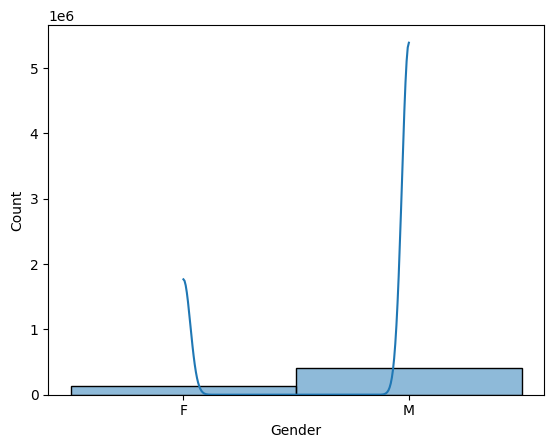

In [20]:
# 예시 코드
sns.histplot(data['Gender'], kde=True)
plt.show()

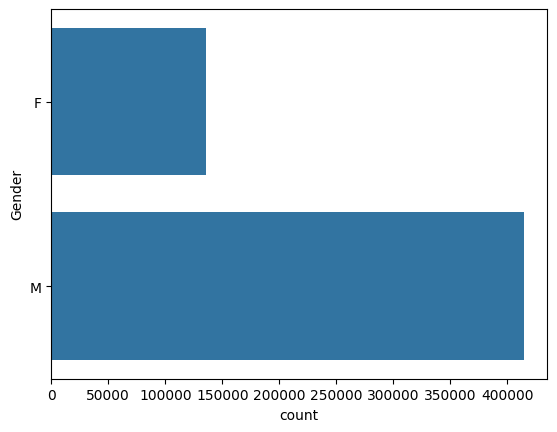

In [10]:
# 예시 코드
sns.countplot(data['Gender']['Occupation'])
plt.show()

<ipython-input-12-ba5921c0143c>:11: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 조정
<ipython-input-12-ba5921c0143c>:11: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 조정
<ipython-input-12-ba5921c0143c>:11: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 조정
<ipython-input-12-ba5921c0143c>:11: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 조정
<ipython-input-12-ba5921c0143c>:11: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 조정
<ipython-input-12-ba5921c0143c>:11: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 조정
/usr/local/lib/python3.10/dist-packages/IPython/c

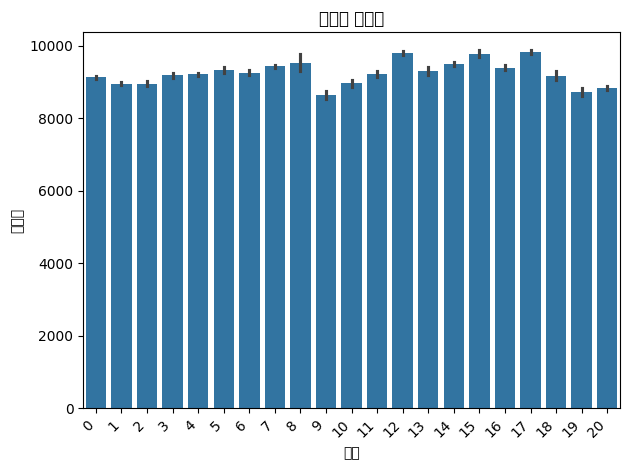

In [12]:

# 직업별 구매량을 나타내는 barplot
sns.barplot(x='Occupation', y='Purchase', data=data)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')

plt.title('직업별 구매량')
plt.xlabel('직업')
plt.ylabel('구매량')

plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 조정
plt.show()